# 01 – Data Exploration & Preprocessing

**Objective (Day 1):**
- Load spam dataset
- Explore class distribution
- Analyze message length
- Clean text data
- Save cleaned data for model training (Day 2)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter

nltk.download('stopwords')

%matplotlib inline
sns.set_style("whitegrid")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lcpat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Load Dataset


In [4]:
DATA_PATH = "../data/spam.csv"

df = pd.read_csv(DATA_PATH, encoding="latin-1")
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (5572, 3)


,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
## Class Distribution


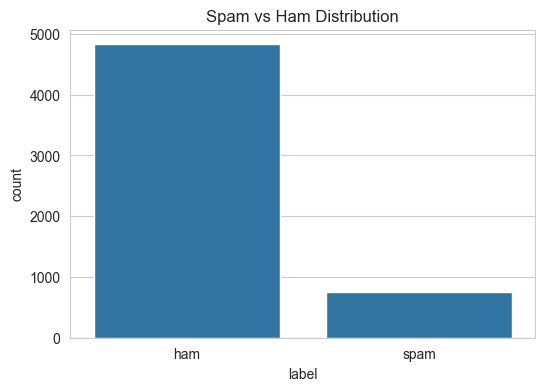

label
ham     86.593683
spam    13.406317
Name: proportion, dtype: float64

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df)
plt.title("Spam vs Ham Distribution")
plt.show()

df['label'].value_counts(normalize=True) * 100


## Message Length Analysis


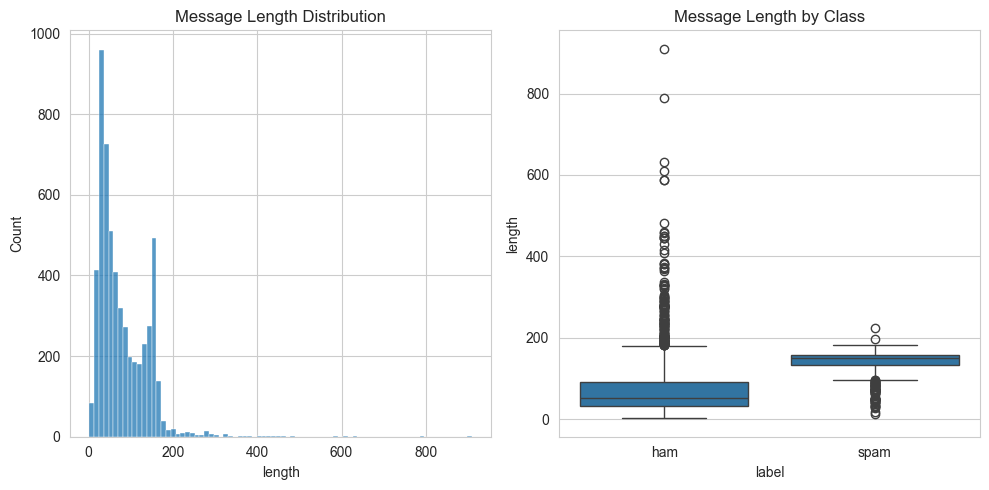

label
ham      71.234197
spam    139.340027
Name: length, dtype: float64

In [6]:
df['length'] = df['message'].apply(len)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.histplot(df['length'], bins=80)
plt.title("Message Length Distribution")

plt.subplot(1,2,2)
sns.boxplot(x='label', y='length', data=df)
plt.title("Message Length by Class")

plt.tight_layout()
plt.show()

df.groupby('label')['length'].mean()


## Text Cleaning Function


In [7]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [stemmer.stem(w) for w in words if w not in stop_words]
    return " ".join(words)


## Apply Cleaning (Sample Test)


In [8]:
df_sample = df.head(50).copy()
df_sample['clean_message'] = df_sample['message'].apply(clean_text)
df_sample[['message', 'clean_message']].head()


,message,clean_message
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...
3,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though


## Apply Cleaning to Full Dataset


In [9]:
cleaned_messages = []

for msg in df['message']:
    cleaned_messages.append(clean_text(msg))

df['clean_message'] = cleaned_messages
print("Text cleaning completed successfully")


Text cleaning completed successfully


## Most Common Words


In [10]:
def get_top_words(series, n=20):
    words = " ".join(series).split()
    return Counter(words).most_common(n)

print("Top words in SPAM:")
get_top_words(df[df['label'] == 'spam']['clean_message'])

print("\nTop words in HAM:")
get_top_words(df[df['label'] == 'ham']['clean_message'])


Top words in SPAM:

Top words in HAM:


[('u', 988),
 ('im', 462),
 ('go', 416),
 ('get', 364),
 ('come', 292),
 ('call', 287),
 ('ltgt', 276),
 ('ok', 272),
 ('dont', 268),
 ('know', 244),
 ('like', 242),
 ('ill', 242),
 ('ur', 240),
 ('love', 234),
 ('got', 232),
 ('good', 223),
 ('time', 220),
 ('day', 219),
 ('want', 212),
 ('need', 175)]

## Save Cleaned Data (For Day 2)


In [11]:
df.to_csv("../data/cleaned_spam.csv", index=False)
df[['clean_message', 'label_num']].to_pickle("../data/processed.pkl")

print("Cleaned data saved successfully")


Cleaned data saved successfully
